In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel
%matplotlib inline

### Preprocessing

In [2]:
data = pd.read_csv('Merged_Data.csv')
data.head()

,Unnamed: 0,Date,HOUR_BIN,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,temp,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,Month,Day of Week
0,0,2018-01-01,0,400,11484.0,109663.0,283254.0,299794.0,-11.575,-16.850,...,9.350,304.25,1026.925,0.00,16.000,0.00,NaN,0.00,1,0
1,1,2018-01-01,4,233,4268.0,32370.0,137862.0,146343.0,-11.975,-16.600,...,7.775,292.75,1027.925,0.05,16.000,16.25,0.150,0.00,1,0
2,2,2018-01-01,8,1070,2275.0,42633.0,151154.0,196377.0,-9.025,-13.350,...,8.350,305.50,1028.500,0.25,15.525,330.25,1.175,3.50,1,0
3,3,2018-01-01,12,1830,4275.0,84638.0,328108.0,415589.0,-5.150,-8.175,...,7.075,320.50,1027.150,0.20,16.000,296.75,1.075,3.25,1,0
4,4,2018-01-01,16,1422,5761.0,81748.0,492717.0,594243.0,-6.350,-9.775,...,7.775,305.75,1027.750,0.20,16.000,2.50,0.000,0.00,1,0


In [43]:
data.head(10)

,Date,HOUR_BIN,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,temp,feelslike,dew,...,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,Month,Day of Week
0,2018-01-01,0,400,11484.0,109663.0,283254.0,299794.0,-11.575000,-16.850000,-17.325000,...,0.0,0.00,0.0000,9.350,304.25,1026.925000,0.00,16.000,1,0
1,2018-01-01,4,233,4268.0,32370.0,137862.0,146343.0,-11.975000,-16.600000,-16.475000,...,0.0,0.00,0.0000,7.775,292.75,1027.925000,0.05,16.000,1,0
2,2018-01-01,8,1070,2275.0,42633.0,151154.0,196377.0,-9.025000,-13.350000,-15.475000,...,0.0,0.00,0.0000,8.350,305.50,1028.500000,0.25,15.525,1,0
3,2018-01-01,12,1830,4275.0,84638.0,328108.0,415589.0,-5.150000,-8.175000,-16.250000,...,0.0,0.00,0.0000,7.075,320.50,1027.150000,0.20,16.000,1,0
4,2018-01-01,16,1422,5761.0,81748.0,492717.0,594243.0,-6.350000,-9.775000,-14.900000,...,0.0,0.00,0.0000,7.775,305.75,1027.750000,0.20,16.000,1,0
5,2018-01-01,20,457,3695.0,52278.0,366547.0,438018.0,-7.433333,-14.833333,-13.366667,...,0.0,0.00,0.0000,21.400,270.00,1027.666667,0.20,16.000,1,0
6,2018-01-02,0,78,1244.0,12242.0,155917.0,156941.0,-8.775000,-15.600000,-14.250000,...,0.0,0.00,0.0000,17.400,266.25,1028.250000,0.10,16.000,1,1
7,2018-01-02,4,3479,1992.0,33812.0,124144.0,212805.0,-8.650000,-15.450000,-13.000000,...,0.0,0.00,0.0000,17.125,267.50,1029.175000,1.30,16.000,1,1
8,2018-01-02,8,3701,6779.0,82077.0,807054.0,1168807.0,-6.225000,-12.600000,-12.225000,...,0.0,0.24,0.8975,17.525,260.75,1029.850000,0.45,16.000,1,1
9,2018-01-02,12,4024,6420.0,89636.0,772772.0,999584.0,-2.150000,-7.950000,-11.300000,...,0.0,0.00,0.7300,19.925,260.50,1027.025000,1.05,16.000,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4380 non-null   int64  
 1   Date              4380 non-null   object 
 2   HOUR_BIN          4380 non-null   int64  
 3   Citibike_Y        4380 non-null   int64  
 4   GreenTaxi_Y       4380 non-null   float64
 5   YellowTaxi_Y      4380 non-null   float64
 6   MTAExit_Y         4380 non-null   float64
 7   MTAEntry_Y        4380 non-null   float64
 8   temp              4380 non-null   float64
 9   feelslike         4380 non-null   float64
 10  dew               4380 non-null   float64
 11  humidity          4380 non-null   float64
 12  precip            4380 non-null   float64
 13  precipprob        4380 non-null   float64
 14  snow              4380 non-null   float64
 15  snowdepth         4380 non-null   float64
 16  windgust          2332 non-null   float64


In [4]:
data = data.drop(['windgust','solarenergy','solarradiation','uvindex','Unnamed: 0'],axis=1).dropna()
#data = data.drop('Unnamed: 0',axis=1).dropna().reset_index()
data.reset_index(drop=True,inplace=True)
data

,Date,HOUR_BIN,Citibike_Y,GreenTaxi_Y,YellowTaxi_Y,MTAExit_Y,MTAEntry_Y,temp,feelslike,dew,...,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,Month,Day of Week
0,2018-01-01,0,400,11484.0,109663.0,283254.0,299794.0,-11.575000,-16.850000,-17.325,...,0.000000,0.0,0.0,9.350000,304.25,1026.925000,0.000000,16.000,1,0
1,2018-01-01,4,233,4268.0,32370.0,137862.0,146343.0,-11.975000,-16.600000,-16.475,...,0.000000,0.0,0.0,7.775000,292.75,1027.925000,0.050000,16.000,1,0
2,2018-01-01,8,1070,2275.0,42633.0,151154.0,196377.0,-9.025000,-13.350000,-15.475,...,0.000000,0.0,0.0,8.350000,305.50,1028.500000,0.250000,15.525,1,0
3,2018-01-01,12,1830,4275.0,84638.0,328108.0,415589.0,-5.150000,-8.175000,-16.250,...,0.000000,0.0,0.0,7.075000,320.50,1027.150000,0.200000,16.000,1,0
4,2018-01-01,16,1422,5761.0,81748.0,492717.0,594243.0,-6.350000,-9.775000,-14.900,...,0.000000,0.0,0.0,7.775000,305.75,1027.750000,0.200000,16.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,2019-12-31,4,3150,516.0,12701.0,137058.0,175073.0,4.125000,1.750000,2.475,...,0.000000,0.0,0.0,9.925000,265.00,1006.225000,48.625000,12.900,12,1
4376,2019-12-31,8,8079,2153.0,41939.0,588964.0,736485.0,4.625000,3.225000,2.650,...,0.000000,0.0,0.0,6.050000,317.00,1005.525000,32.825000,16.000,12,1
4377,2019-12-31,12,12011,3451.0,62170.0,796791.0,997440.0,6.425000,3.400000,3.275,...,75.000000,0.0,0.0,15.950000,254.00,1003.450000,24.175000,16.000,12,1
4378,2019-12-31,16,6088,4469.0,64740.0,973974.0,1236863.0,6.575000,4.200000,2.450,...,25.000000,0.0,0.0,12.475000,258.50,1003.850000,42.675000,16.000,12,1


In [5]:
def split_X_and_Y(data):
    list_=[]
    for i in data.columns:
        if '_Y' not in i:
            list_.append(i)
    X = data[list_].drop('Date',axis=1)
    Y_plot = data[['Date','Citibike_Y']]
    Y = data[['Citibike_Y']]
    return X,Y
X,Y = split_X_and_Y(data)

In [6]:
X.describe()

,HOUR_BIN,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,Month,Day of Week
count,4380.00000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,10.00000,32.767629,31.641096,23.847451,66.411185,0.168929,14.600457,0.009938,0.414431,9.182047,187.238761,1017.640556,23.261880,12.711252,6.526027,2.993151
std,6.83208,28.604967,29.872810,26.569764,17.552040,2.455728,28.391900,0.081623,1.877873,5.693534,99.282969,8.067116,22.528808,3.449083,3.448245,2.001928
min,0.00000,-13.900000,-21.575000,-20.025000,15.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,988.000000,0.000000,1.150000,1.000000,0.000000
25%,4.00000,8.625000,6.900000,1.700000,53.334167,0.000000,0.000000,0.000000,0.000000,5.150000,88.000000,1012.400000,1.050000,9.900000,4.000000,1.000000
50%,10.00000,22.170833,21.825000,15.525000,65.510417,0.000000,0.000000,0.000000,0.000000,7.925000,217.375000,1017.750000,17.137500,14.387500,7.000000,3.000000
75%,16.00000,62.706250,62.706250,50.700000,81.000000,0.002250,25.000000,0.000000,0.000000,11.881250,268.000000,1022.850000,44.406250,16.000000,10.000000,5.000000
max,20.00000,95.750000,108.200000,75.925000,99.840000,73.935000,100.000000,2.667500,19.360000,39.100000,359.750000,1043.725000,100.000000,16.000000,12.000000,6.000000


In [7]:
categorical = ['HOUR_BIN','Month','Day of Week']

def onehotencoder(X,categorical):
    for i in categorical:
        X = X.drop(i,axis=1).merge(pd.get_dummies(X[i],prefix=i),left_index=True, right_index=True)
    return X
X_encoded = onehotencoder(X,categorical)

In [8]:
X_encoded.columns

Index(['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'snow',
       'snowdepth', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'HOUR_BIN_0', 'HOUR_BIN_4', 'HOUR_BIN_8', 'HOUR_BIN_12',
       'HOUR_BIN_16', 'HOUR_BIN_20', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Day of Week_0', 'Day of Week_1',
       'Day of Week_2', 'Day of Week_3', 'Day of Week_4', 'Day of Week_5',
       'Day of Week_6'],
      dtype='object')

### Finding good correlators

In [9]:
def bestcorrelators(X_encoded,n=10):
    Xs = X_encoded.columns
    n = min(n,len(X_encoded.columns))
    list_=[]
    for X in Xs:
        XN = X.replace(' ','_')
        temp = Y.merge(X_encoded[[X]],left_index=True, right_index=True).rename({X:XN},axis=1)
        formula = 'Citibike_Y'+'~'+ XN
        lm = smf.ols(formula=formula,data=temp).fit()
        list_.append([X,lm.rsquared])
    bestn = pd.DataFrame(list_,columns = ['X','rsquared']).nlargest(n,'rsquared')
    return list(bestn['X'].reset_index(drop=True))
bestcorrelators(X_encoded)

['HOUR_BIN_0',
 'HOUR_BIN_16',
 'humidity',
 'feelslike',
 'HOUR_BIN_20',
 'temp',
 'HOUR_BIN_12',
 'dew',
 'Month_1',
 'precipprob']

### Creating a metric to evaluate the model

In [10]:
def evaluatemodel(y_pred,y_test,percentage=5):
    y_test = np.array(y_test).ravel()
    minimum = y_test*(1-percentage/100)
    maximum = y_test*(1+percentage/100)
    temp = (y_pred<=maximum) & (y_pred>=minimum)
    return temp.sum()/len(y_test)

### Finding and removing outliers in data to prevent the model from skewing

In [11]:
def removedensityoutliers(X_encoded,Y,factor=150):
    n = len(X_encoded)//factor
    temp = X_encoded.copy()
    anom = LocalOutlierFactor(n_neighbors=n, novelty=False)
    X_Out = anom.fit_predict(temp)
    temp['Outlier'] = X_Out
    indexes = temp[temp['Outlier'] == 1].index
    return X_encoded.iloc[indexes].reset_index(drop=True),Y.iloc[indexes].reset_index(drop=True)
X_Processed,Y_Processed = removedensityoutliers(X_encoded,Y)

In [12]:
X_Processed.shape[0]/X_encoded.shape[0]

0.9881278538812786

### Building a Model

In [40]:
Number_of_predictors = 25
Outlier_Factor = 50

X_Processed,Y_Processed = removedensityoutliers(X_encoded,Y,Outlier_Factor)

Y_array = np.array(Y_Processed['Citibike_Y'])
X_train, X_test, y_train, y_test = train_test_split(X_Processed,Y_array, test_size=0.25, random_state=123)

#finding the best correlators from training data
Xs = bestcorrelators(X_train,Number_of_predictors)

print(Xs)

#Using only those features
X_train = np.array(X_train[Xs])
X_test = np.array(X_test[Xs])

#Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Testing out different models
param_grid_lr = {}
lr = LinearRegression()

param_grid_svr = {'kernel':['rbf'],'degree':range(30,31),'gamma':['scale','auto']}
svr = SVR()

param_grid_sgd = {'penalty':['l1','l2'],'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2],'max_iter':[100000]}
sgd=SGDRegressor()

#param_grid_dtr = {'random_state':[123],'min_samples_leaf':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],'max_depth':range(5,15),'splitter':['best'],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'max_features':['auto','sqrt','log2'],'ccp_alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-7,1e-8,1e-9,1e-10]}
param_grid_dtr = {'random_state':[123],'min_samples_leaf':[1e-5],'max_depth':[10],'splitter':['best'],'criterion':['absolute_error'],'max_features':['auto'],'ccp_alpha':[0.01]}
dtr=DecisionTreeRegressor()

#param_grid_rfr = {'n_estimators':[1000],'criterion':['squared_error','absolute_error','poisson'],'max_features':['sqrt','log2',None],'ccp_alpha':[1e-2,1e-3]}
param_grid_rfr = {'ccp_alpha':[0.1],'criterion': ['squared_error'],'max_features': [None],'n_estimators': [2000]}  #Obtained after training
rfr = RandomForestRegressor()

param_grid_gbr = {'loss':['squared_error'],'criterion': ['friedman_mse'],'n_estimators':[1000],'ccp_alpha':[0.01]}
#param_grid_gbr = {'loss':['squared_error'],'criterion': ['friedman_mse','squared_error'],'learning_rate':[0.01,0.1],'n_estimators':[1000],'ccp_alpha':[1,1e-1]}
gbr = GradientBoostingRegressor()

kernel1 = 1.* RBF(length_scale=0.1, length_scale_bounds=(1e-7, 1e5)) \
    + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e5))

kernel2 = 1.* RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2)) \
    + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-2, 1e2))

param_grid_gpr = {'kernel':[kernel2], 'alpha':[0.01], 'optimizer':['fmin_l_bfgs_b',None], 'n_restarts_optimizer':[0], 'normalize_y':[False], 'random_state':[None]}
gpr= GaussianProcessRegressor()
    
#Using gridsearch for hyperparamter optimization
#Linear methods
#gr=GridSearchCV(lr,param_grid=param_grid_lr,cv=5)
#gr=GridSearchCV(svr,param_grid=param_grid_svr,cv=5)
#gr=GridSearchCV(sgd,param_grid=param_grid_sgd,cv=5)
#gr.fit(X_train,np.log(np.array(y_train)).ravel())

#Tree and ensemble based
#gr=GridSearchCV(dtr,param_grid=param_grid_dtr,cv=5)
gr=GridSearchCV(rfr,param_grid=param_grid_rfr,cv=5,verbose=2)
#gr =GridSearchCV(gbr,param_grid=param_grid_gbr,cv=5,verbose=1)
#gr=GridSearchCV(gpr,param_grid=param_grid_gpr,cv=5)
gr.fit(X_train,np.array(y_train).ravel())                  

#Output the best parameter
gr.best_params_

['dew', 'feelslike', 'temp', 'Month_1', 'Month_2', 'snowdepth', 'Month_8', 'HOUR_BIN_16', 'Month_9', 'Month_3', 'Month_10', 'Month_12', 'Month_6', 'windspeed', 'humidity', 'Month_7', 'cloudcover', 'winddir', 'snow', 'HOUR_BIN_8', 'visibility', 'HOUR_BIN_4', 'HOUR_BIN_20', 'Day of Week_6', 'HOUR_BIN_0']
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ccp_alpha=0.1, criterion=squared_error, max_features=None, n_estimators=2000; total time= 1.0min
[CV] END ccp_alpha=0.1, criterion=squared_error, max_features=None, n_estimators=2000; total time= 1.0min
[CV] END ccp_alpha=0.1, criterion=squared_error, max_features=None, n_estimators=2000; total time= 1.0min
[CV] END ccp_alpha=0.1, criterion=squared_error, max_features=None, n_estimators=2000; total time= 1.1min
[CV] END ccp_alpha=0.1, criterion=squared_error, max_features=None, n_estimators=2000; total time= 1.1min


{'ccp_alpha': 0.1,
 'criterion': 'squared_error',
 'max_features': None,
 'n_estimators': 2000}

<b> In sample error

In [41]:
#If using tre based methods
y_pred = gr.predict(X_train)
evaluatemodel(y_pred,y_train,15)

0.7877300613496933

In [42]:
#If using tre based methods
y_pred = gr.predict(X_test)
evaluatemodel(y_pred,y_test,15)

0.40386384544618215

<b> Out of sample error

In [16]:
#If using lr,svr or sgd
#y_pred = gr.predict(X_train)
#evaluatemodel(np.exp(y_pred),y_train,10)

In [17]:
#If using lr,svr or sgd
#y_pred = gr.predict(X_test)
#evaluatemodel(np.exp(y_pred),y_test,10)

In [18]:
predictions =  pd.DataFrame([y_test,y_pred]).transpose().sort_values(0).reset_index(drop=True).rename({0:'Actual',1:'Predicted'},axis=1)
#predictions =  pd.DataFrame([np.exp(y_test),np.exp(y_pred)]).transpose().sort_values(1).reset_index(drop=True)

<AxesSubplot:>

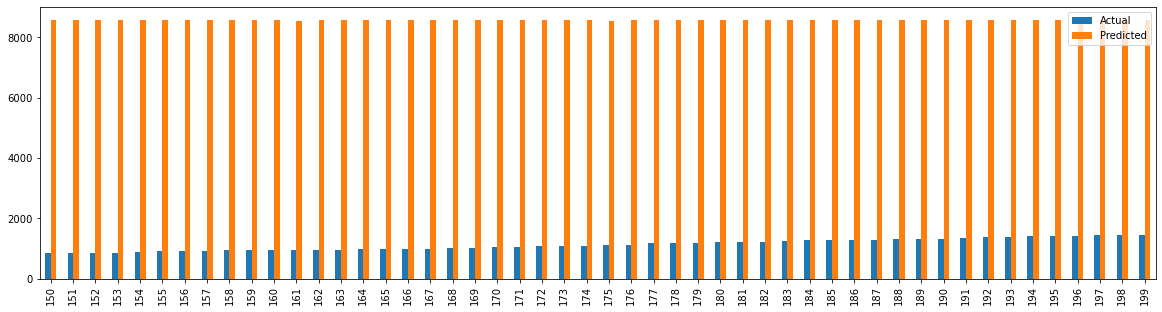

In [19]:
predictions[150:200].plot.bar(figsize=(20,5))